In [141]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Flatten, Activation, MaxPool2D, AvgPool2D, Conv2D, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

array([[[23, 36, 65],
        [23, 34, 65],
        [21, 32, 71],
        ...,
        [32, 37, 61],
        [29, 37, 61],
        [29, 36, 61]],

       [[23, 35, 65],
        [23, 35, 65],
        [23, 34, 66],
        ...,
        [30, 37, 61],
        [29, 37, 61],
        [29, 37, 61]],

       [[23, 35, 67],
        [23, 34, 67],
        [21, 32, 69],
        ...,
        [30, 37, 61],
        [29, 37, 61],
        [29, 37, 61]],

       ...,

       [[14, 23, 42],
        [14, 23, 52],
        [14, 21, 48],
        ...,
        [10, 14, 35],
        [11, 14, 34],
        [11, 15, 35]],

       [[12, 18, 47],
        [12, 18, 45],
        [12, 16, 42],
        ...,
        [12, 16, 37],
        [12, 16, 36],
        [12, 16, 35]],

       [[12, 20, 45],
        [12, 20, 43],
        [12, 20, 43],
        ...,
        [11, 15, 35],
        [11, 15, 35],
        [11, 15, 35]]], dtype=uint8)

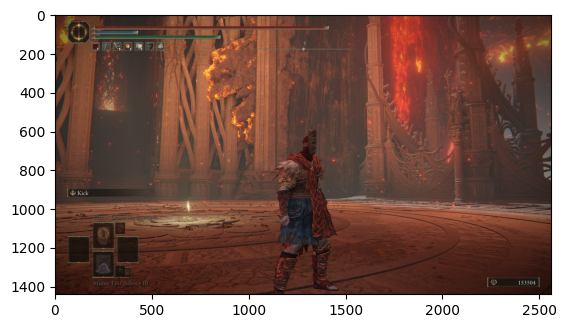

In [142]:
image = image.load_img("trainsets/elden_ring/eldenThrone.png")
plt.imshow(image)

cv2.imread("trainsets/elden_ring/eldenThrone.png")


In [143]:
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)


train_dataset = train.flow_from_directory('trainsets/', 
                                          target_size= (400, 400),
                                          batch_size= 3, 
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('ValidationSet/', 
                                          target_size= (400, 400),
                                          batch_size= 3, 
                                          class_mode = 'binary')

train_dataset.class_indices
train_dataset.classes

Found 31 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
model = Sequential()
model.add(Conv2D(16, (3, 3),activation = 'relu' ,input_shape=(400, 400, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [145]:
model.compile(loss= 'binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.0001),
              metrics = ['accuracy'])

In [146]:
model_fit = model.fit(train_dataset, 
                      batch_size=3,
                      epochs=10, 
                      validation_data=validation_dataset)


c:\Users\lucvd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


ValueError: Could not interpret loss identifier: binary_crosstropy